In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 6] 

In [5]:

def curveS(x, L, k, x0):
    """
    This is like a Fermi-Dirac type distribution
    Parameters:
    - x: Input data (independent variable).
    - L: Maximum value of the curve (upper asymptote).
    - k: Steepness of the curve.
    - x0: x-value of the sigmoid's midpoint.

    Returns:
    - Fitted curve values.
    """
    return L / (1 + np.exp(k * (x - x0)))

def fitcurveS(x_data, y_data, ifplot=True):
    """
    Parameters:
    - x_data: Input data (independent variable).
    - y_data: Output data (dependent variable).
    Returns:
    - Fitted parameters: L, k, x0.
    """
    
    y_data_filtered = savgol_filter(y_data, window_length=11, polyorder=3)
    initial_guess = [max(y_data_filtered), 1, np.median(x_data)]
    
    # Use curve_fit to find the best-fitting parameters
    fitted_params, _ = curve_fit(curveS, x_data, y_data_filtered, p0=initial_guess)
    
    # Generate the fitted curve
    fitted_curve = curveS(x_data, *fitted_params)
    if ifplot:
        plt.figure()
        plt.scatter(x_data, y_data_filtered, label='Dataset', c='k', s=5)
        plt.plot(x_data, fitted_curve, label='Fitted Curve', color='red')
        plt.legend()
        plt.xlabel('A--B')
        plt.ylabel('Key Rates')
       # plt.title('Curve Fit for required data')

    return fitted_params


data = pd.read_csv("3stage1.csv")

In [6]:
def find_transition_point(data):
    # Compute the first derivative

    derivative = np.diff(data)

    # Plot the data and its derivative for visualization
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(data, '-o', label="Data", c='k')
    plt.title("Original Data")

    plt.subplot(2, 1, 2)
    plt.plot(derivative, '-o', label="Derivative", color="red")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("First Derivative")
    plt.tight_layout()
    plt.show()

    # Finding the transition point
    threshold = -0.002  # This threshold can be adjusted
    transition_points = np.where(derivative < threshold)[0]

    # The first consistent negative value after flatline
    transition_point = None
    for i in range(1, len(transition_points)):
        if (transition_points[i] - transition_points[i-1] == 1) and (i!=1) :
            transition_point = transition_points[i]
            break

    if transition_point is not None:
        print(f"The dataset starts transitioning at index {transition_point} with value {data[transition_point]}")
    else:
        print("Couldn't find a clear transition point.")
        
    return transition_point

In [7]:
data = pd.read_csv("burst_profile.csv")

In [8]:
display(data)

,Burst1,Burst50,Burst100,Burst150,Burst200,Burst1000,Burst10000,Burst100000,Burst1000000
0,0.55423,0.60801,0.62291,0.61392,0.61483,0.5992,0.6102,0.6314,0.6012
1,0.50010,0.62220,0.61573,0.61503,0.62038,0.6122,0.6490,0.5903,0.6273
2,0.45629,0.61312,0.60961,0.61031,0.60771,0.6162,0.6172,0.6032,0.6294
3,0.41465,0.61332,0.62028,0.61947,0.62210,0.6335,0.5972,0.6263,0.6273
4,0.36769,0.61091,0.62647,0.61826,0.60731,0.6162,0.6052,0.6355,0.6243
...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,0.0002,0.0006,0.0189,0.1488
146,NaN,NaN,NaN,NaN,NaN,0.0004,0.0007,0.0148,0.1342
147,NaN,NaN,NaN,NaN,NaN,0.0002,0.0008,0.0140,0.1144
148,NaN,NaN,NaN,NaN,NaN,0.0001,0.0018,0.0122,0.1083


In [9]:
b1 = np.array(data.Burst1)
b50 = np.array(data.Burst50)
b100 = np.array(data.Burst100)
b150 = np.array(data.Burst150)
b200 = np.array(data.Burst200)
b1000 = np.array(data.Burst1000)
b10000 = np.array(data.Burst10000)
b100000 = np.array(data.Burst100000)
b1000000 = np.array(data.Burst1000000)

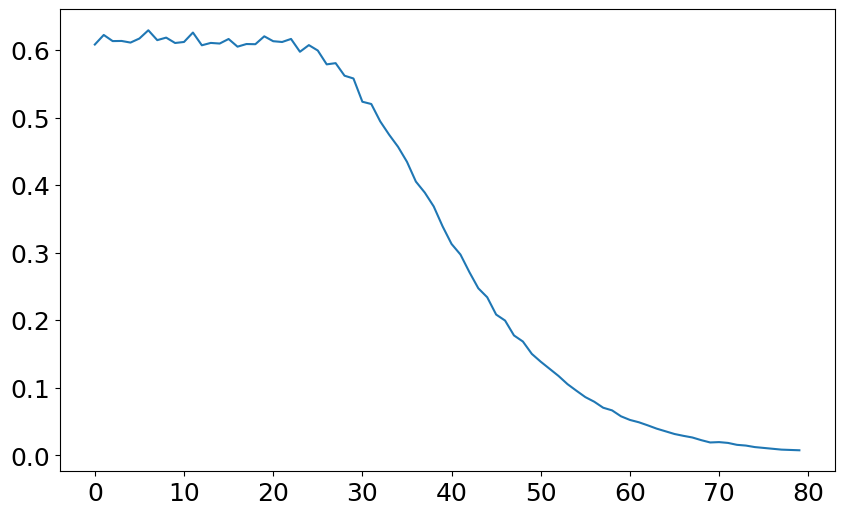

In [10]:
plt.plot(b50)

In [11]:
b = np.array([b1, b50, b100, b150, b200])
b2 = np.array([b1000, b10000, b100000, b1000000])

[ 0.62041354  0.14220046 69.74965608]
[ 0.61765381  0.14974806 92.15284298]
[  0.62189107   0.15473121 114.26042794]
[  0.61858825   0.15250904 136.2333391 ]


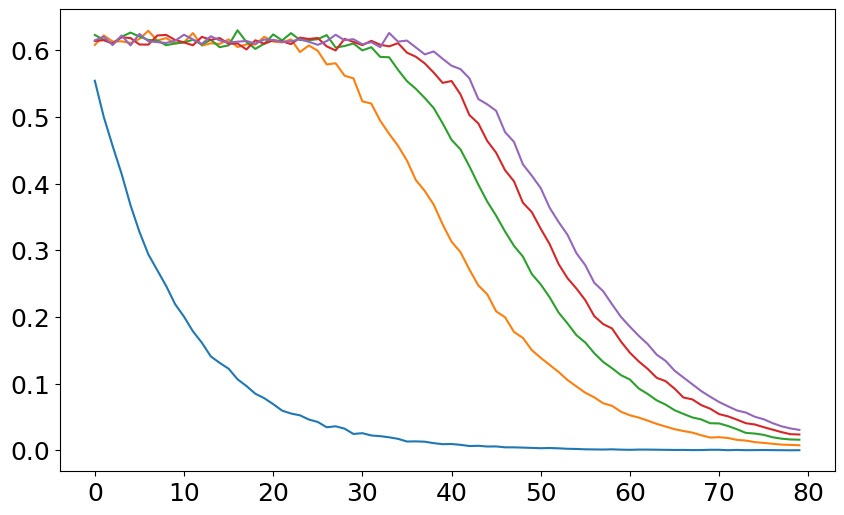

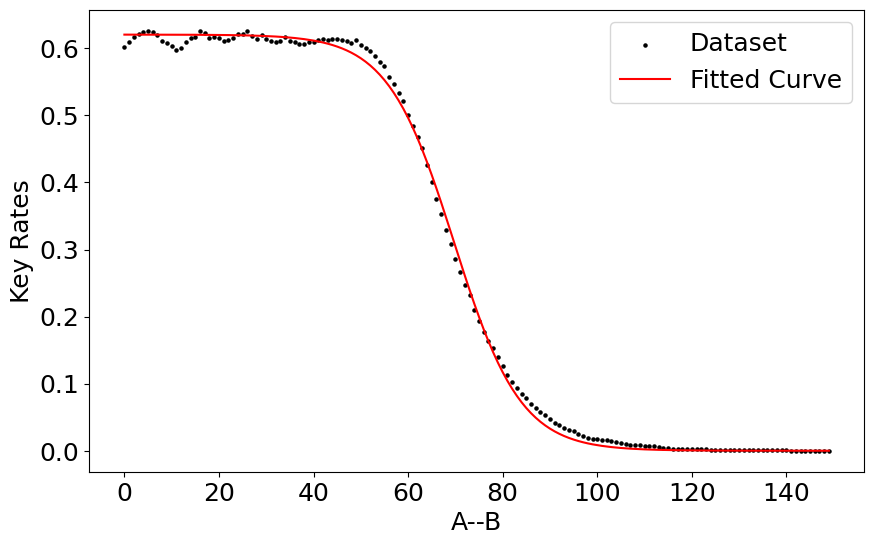

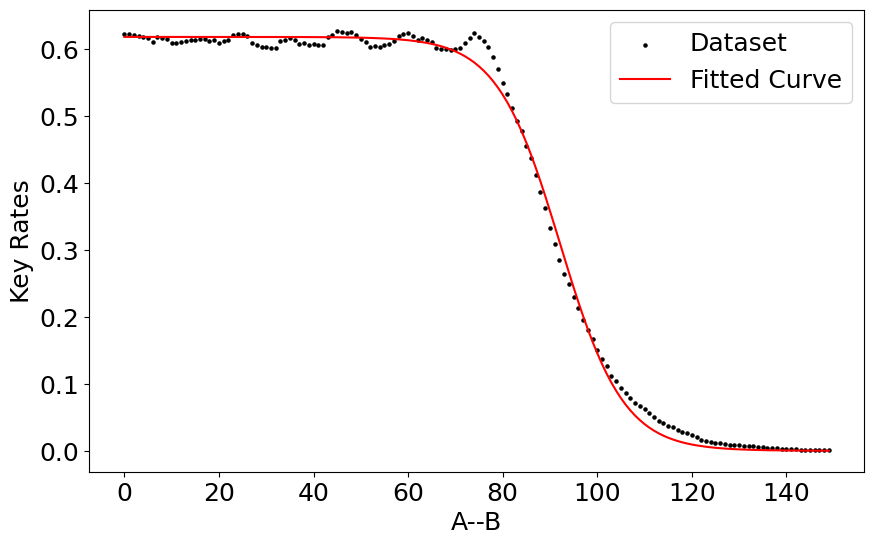

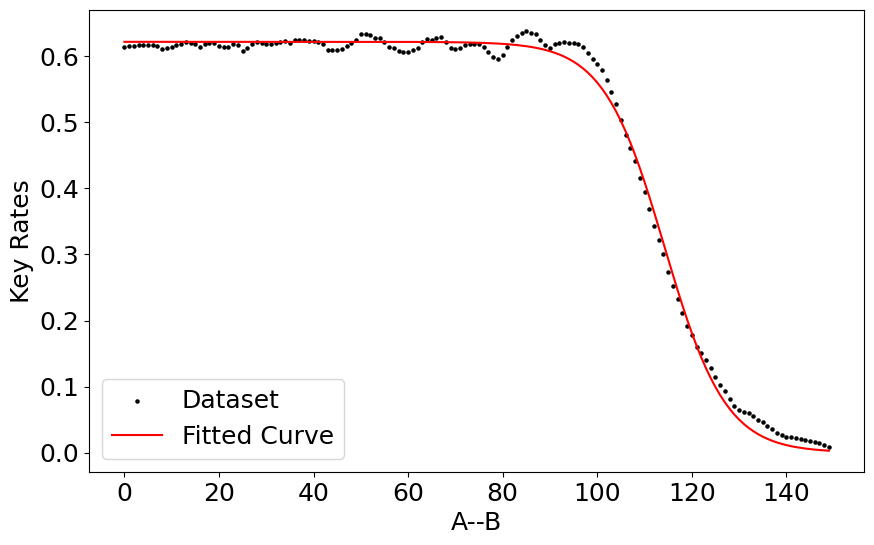

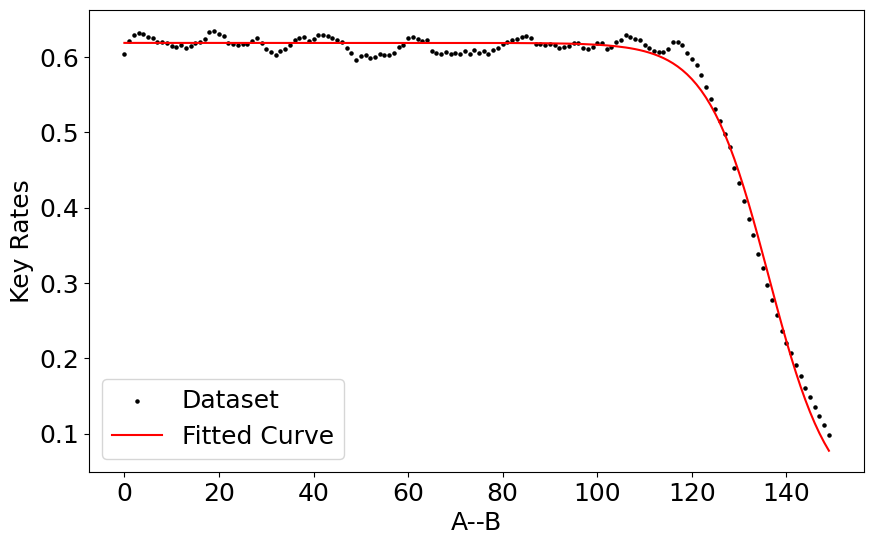

In [12]:
for i in b:
    plt.plot(i)
    
    
parametersk = []
parametersx0 = []
for i in b2:
    x = np.arange(0, len(i))
    p = fitcurveS(x, i)
    print(p)
    parametersk.append(p[1])
    parametersx0.append(p[2])

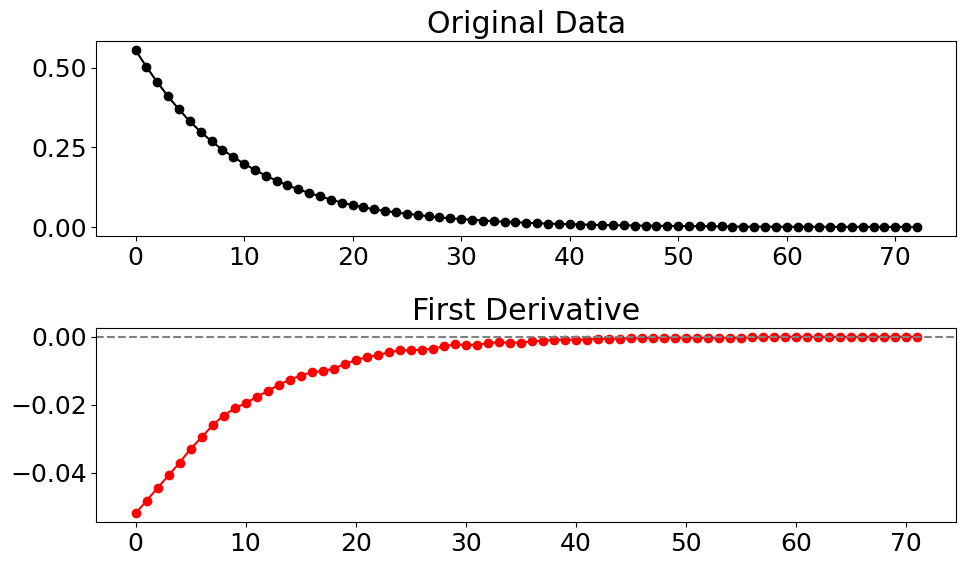

The dataset starts transitioning at index 2 with value 0.4540262743922744


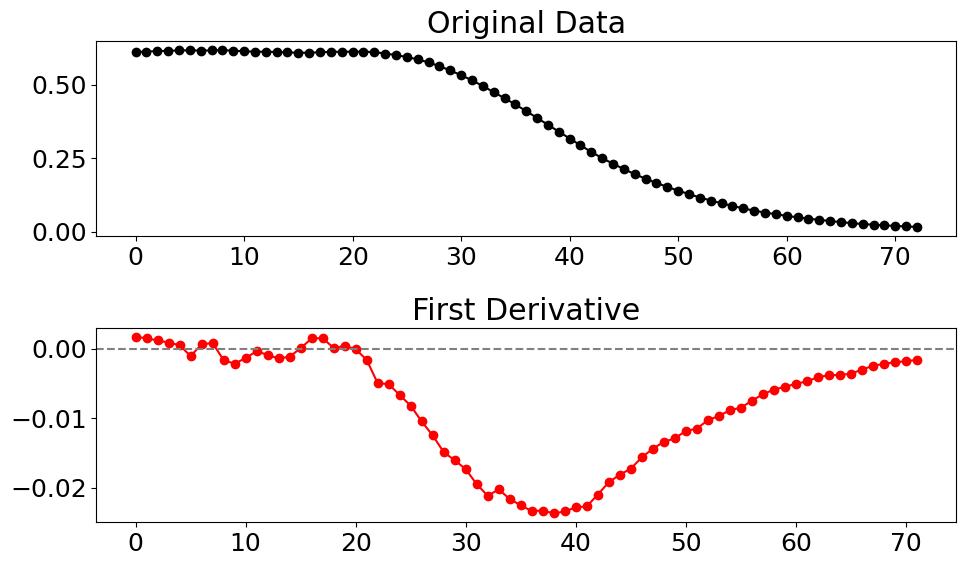

The dataset starts transitioning at index 23 with value 0.6067044908424924


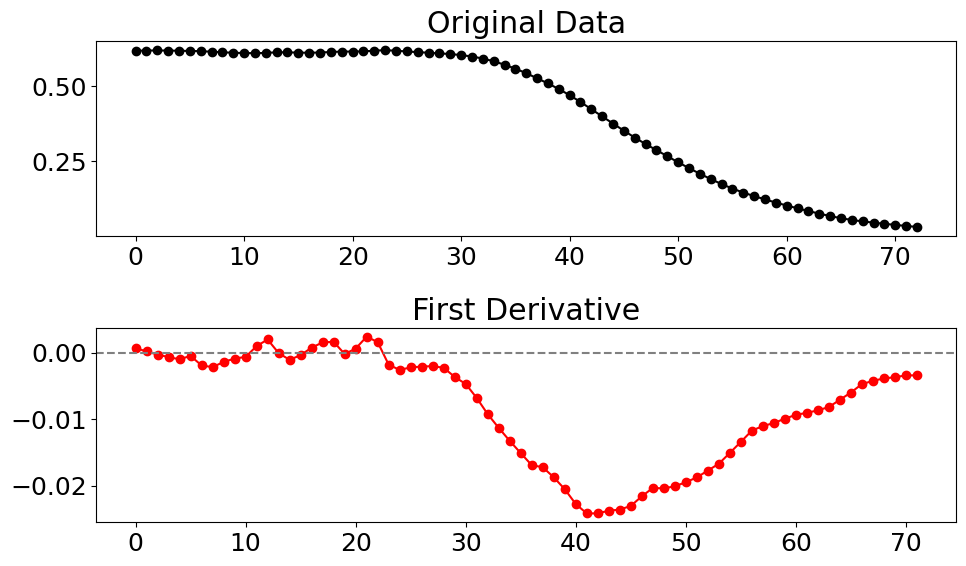

The dataset starts transitioning at index 25 with value 0.6157998008658027


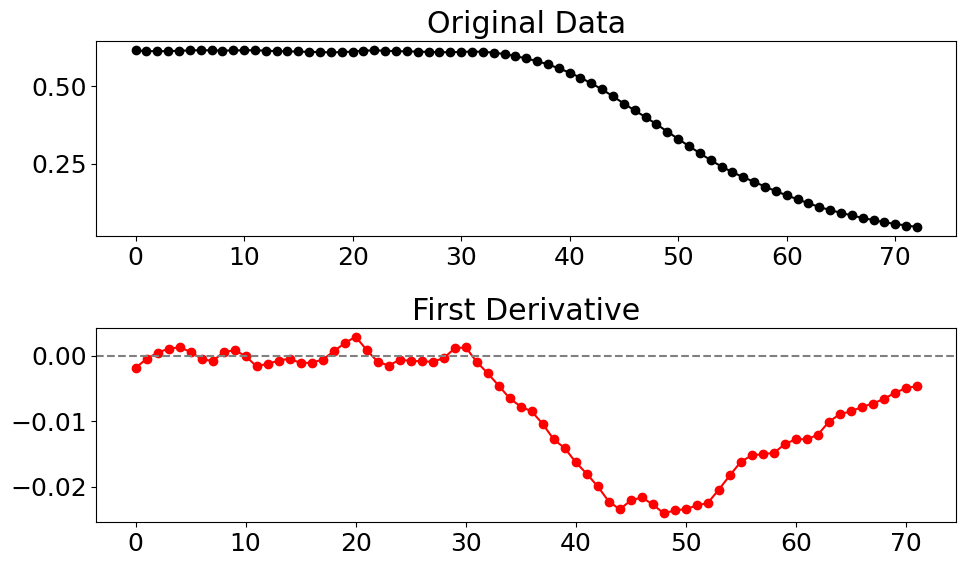

The dataset starts transitioning at index 34 with value 0.6036921618381635


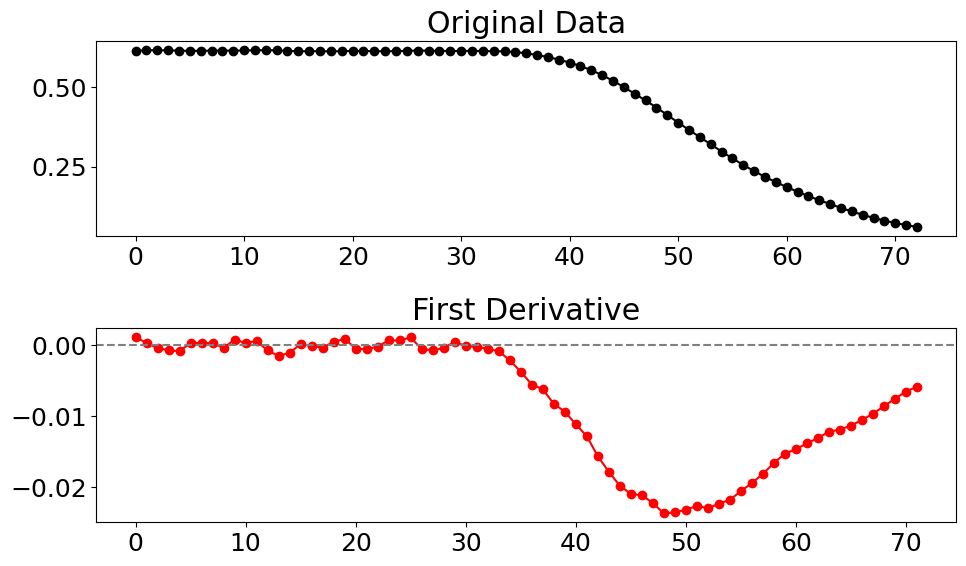

The dataset starts transitioning at index 36 with value 0.6068238394938412


In [13]:
filtered = []
transition1 = []

for dataset in b:
    y_data = savgol_filter(dataset, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data,window_length=11, polyorder=3)
    point = find_transition_point(y_data)
    transition1.append(point)


In [11]:
burst1 = [1, 50, 100, 150, 200]
len(transition1)

5

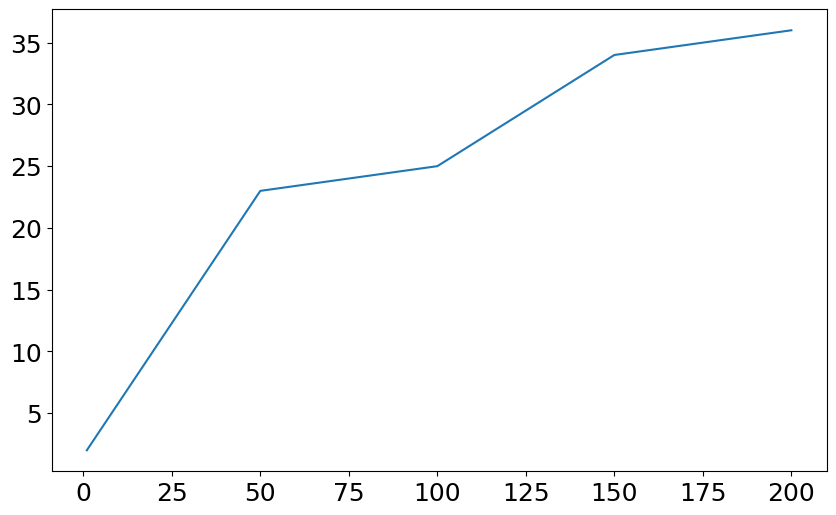

In [12]:
plt.plot(burst1, transition1)

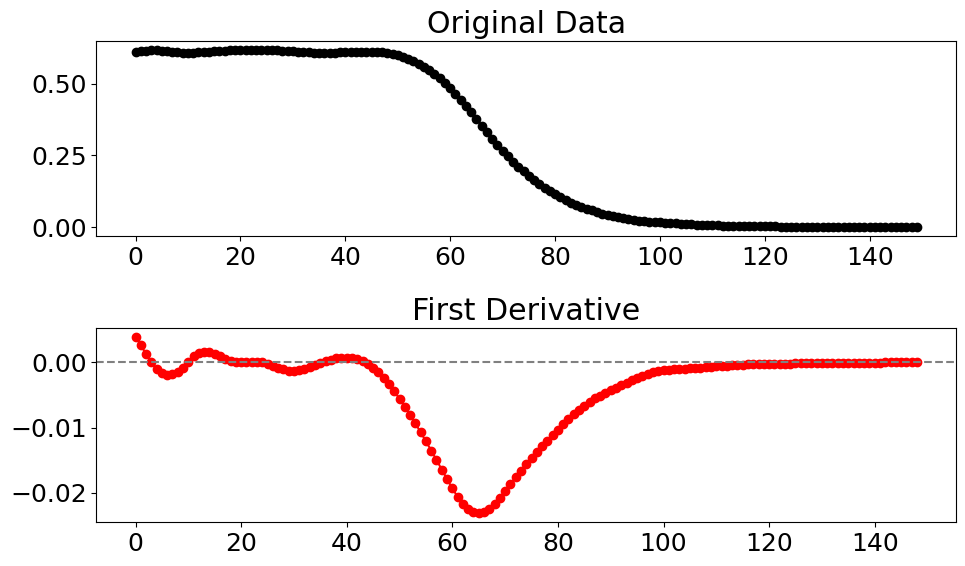

The dataset starts transitioning at index 49 with value 0.604928225488946


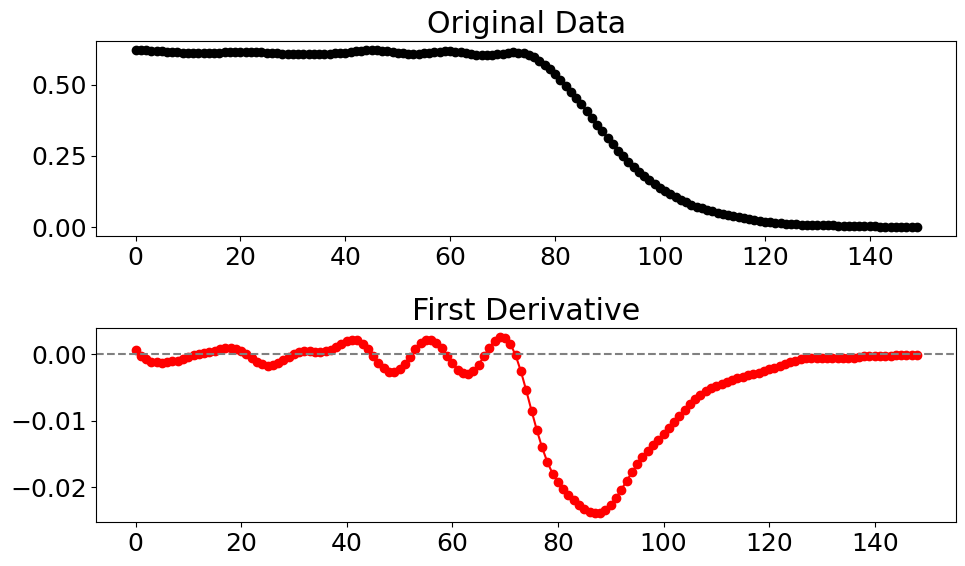

The dataset starts transitioning at index 49 with value 0.6146168767496704


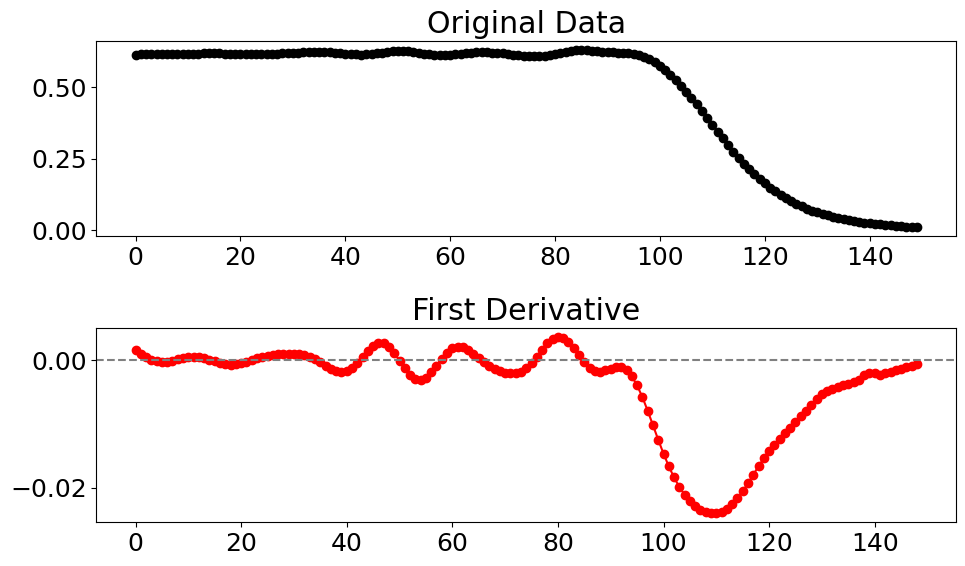

The dataset starts transitioning at index 54 with value 0.6205348222217529


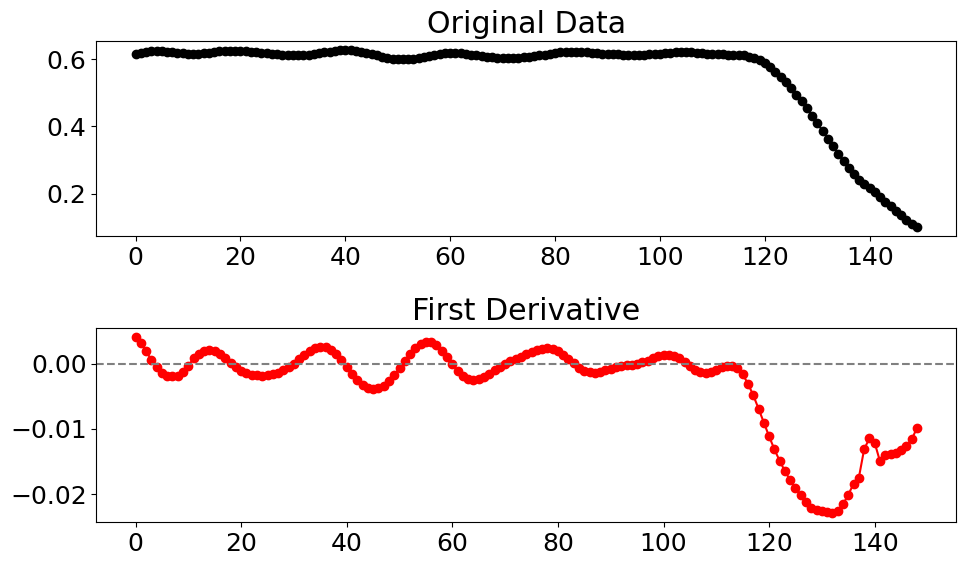

The dataset starts transitioning at index 44 with value 0.6195271658706669


In [13]:
filtered = []
transition2 = []

for dataset in b2:
    y_data = savgol_filter(dataset, window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=15, polyorder=4)
    y_data = savgol_filter(y_data,window_length=15, polyorder=5)
    y_data = savgol_filter(y_data, window_length=20, polyorder=6)
    y_data = savgol_filter(y_data, window_length=20, polyorder=6)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    point = find_transition_point(y_data)
    transition2.append(point)


In [15]:
transition2 = [50, 75, 96, 110]

In [21]:
burst2 = [1000, 10000, 100000, 1000000]
burst = burst1+burst2
print(burst)
transition=transition1+transition2

[1, 50, 100, 150, 200, 1000, 10000, 100000, 1000000]


In [17]:
a,b,c,d = np.polyfit(np.log(burst), transition, 3)

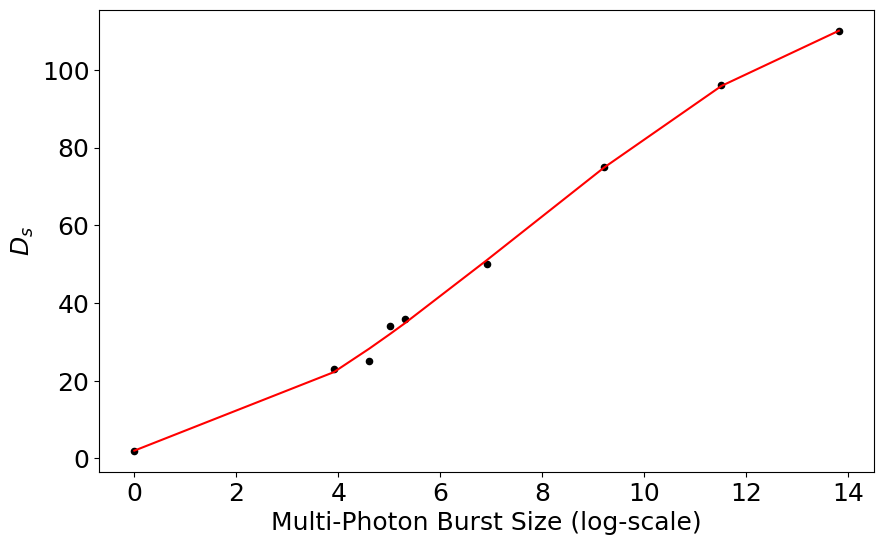

In [18]:
plt.scatter(np.log(burst), transition, c='k', s=20)
plt.plot(np.log(burst), a*np.log(burst)**3+b*np.log(burst)**2+c*np.log(burst)+d, c='r', ls='-')
plt.ylabel(f'$ D_s$')
plt.xlabel('Multi-Photon Burst Size (log-scale)')
plt.savefig('highorderlogtransition', dpi=1000)
plt.show()

In [19]:
print(f'{a}x^3+{b}x^2+{c}x+{d}')

-0.05417597170123314x^3+1.2285630549004998x^2+1.1878638039087528x+2.0178170341587616


In [19]:
print(transition)

[2, 23, 25, 34, 36, 50, 75, 96, 110]


a = -0.0542  ± 1.96 σ  →  [-0.0734, -0.0350]
b = 1.2286  ± 1.96 σ  →  [0.8407, 1.6165]
c = 1.1879  ± 1.96 σ  →  [-0.9068, 3.2825]
d = 2.0178  ± 1.96 σ  →  [-1.6557, 5.6914]


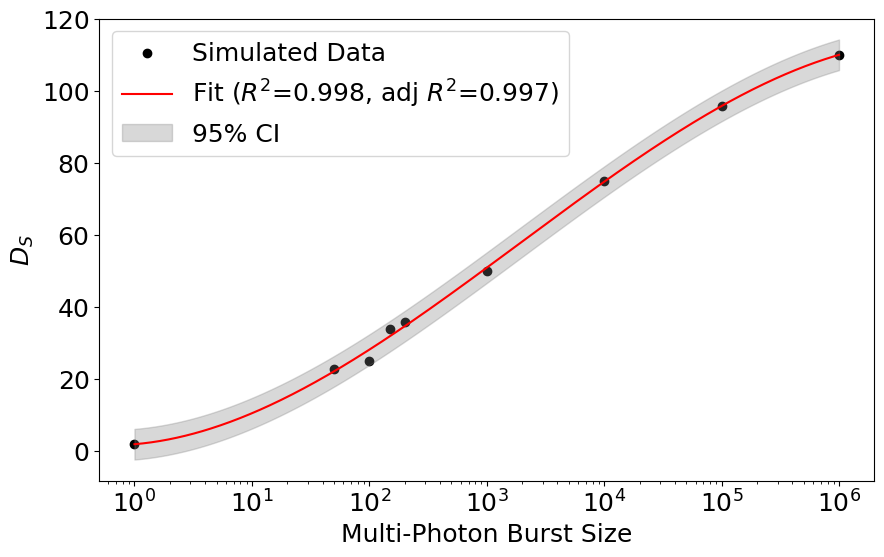

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1) Define your data
burst      = np.array([1,50,100,150,200,1000,10000,100000,1000000],dtype=float)
transition = np.array(transition,dtype=float)

# 2) Define the model: cubic in log(burst)
def model(log_burst, a, b, c, d):
    return a*log_burst**3 + b*log_burst**2 + c*log_burst + d

# 3) Fit and get covariance
popt, pcov = curve_fit(model, np.log(burst), transition)
perr       = np.sqrt(np.diag(pcov))        # standard errors

# 4) 95% confidence intervals
ci = np.vstack((popt - 1.96*perr, popt + 1.96*perr)).T
for name, (low, high) in zip(['a','b','c','d'], ci):
    print(f"{name} = {popt[np.where(ci[:,0]==low)[0][0]]:.4f}  ± 1.96 σ  →  [{low:.4f}, {high:.4f}]")

# 5) Compute R² (same as before)
y_pred = model(np.log(burst), *popt)
ss_res = np.sum((transition - y_pred)**2)
ss_tot = np.sum((transition - np.mean(transition))**2)
r2     = 1 - ss_res/ss_tot
adj_r2 = 1 - (1-r2)*(len(burst)-1)/(len(burst)-len(popt)-1)

# 6) Plot with CI band
log_b = np.linspace(np.log(burst.min()), np.log(burst.max()), 500)
fit   = model(log_b, *popt)
# approximate prediction‐interval ignoring covariance for simplicity:
sigma_pred = np.sqrt(np.diag(pcov).sum())  
upper = fit + 1.96*sigma_pred
lower = fit - 1.96*sigma_pred

plt.figure()
plt.scatter(burst, transition, label='Simulated Data', c='k')
plt.plot(np.exp(log_b), fit,  label=f'Fit ($R^2$={r2:.3f}, adj $R^2$={adj_r2:.3f})', c='r')
plt.fill_between(np.exp(log_b), lower, upper, color='gray', alpha=0.3, label='95% CI')
plt.xscale('log')
plt.xlabel('Multi-Photon Burst Size'); plt.ylabel(f'$D_S$')
plt.legend(); 
plt.savefig('reviewer.png', dpi=300)
plt.show()


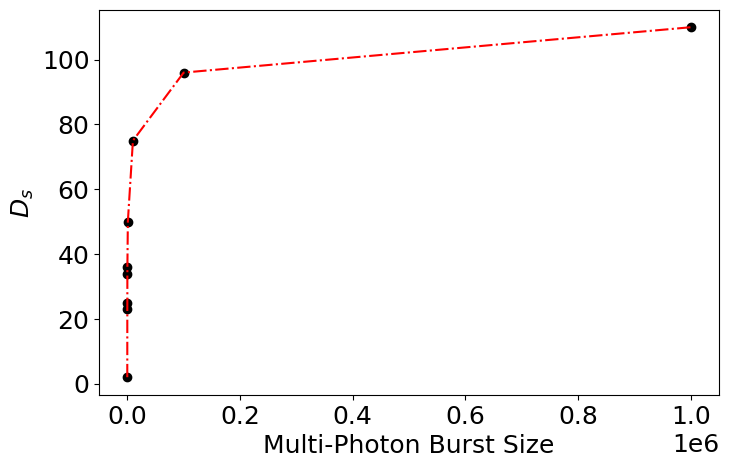

Fitted parameters: a=26.573567, b=0.005600, c=-0.000000, d=0.000000


In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def polynomial(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

# Given dataset
x_data =[1, 50, 100, 150, 200, 1000, 10000, 100000, 1000000]
y_data = [2, 23, 25, 34, 36, 50, 75, 96, 110]

# Use curve_fit to find the best-fitting parameters for the polynomial function.
params, covariance = curve_fit(polynomial, x_data, y_data)

# Generate the fitted curve.
x_fit = np.linspace(0, 210, 400)
y_fit = polynomial(x_fit, *params)

# Plot the data and the fitted curve.
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, color='k', label='Burst-Stable Distance')
plt.plot(x_data, y_data, color='red', label='3rd Order Fitted Curve', ls='-.')

# Construct the equation string and display on the graph
equation_str = f"y = {params[0]:.2f} + {params[1]:.2f}x + {params[2]:.2f}x^2 + {params[3]:.2f}x^3"
#plt.annotate(equation_str, xy=(0.05, 0.75), xycoords='axes fraction', color='red', fontsize=10)

plt.ylabel(f'$D_s$')
plt.xlabel('Multi-Photon Burst Size')
#plt.title('Curve Fitting using Polynomial Function')
#plt.grid(True)
plt.savefig('highburst', dpi=(1000))
plt.show()

print(f"Fitted parameters: a={params[0]:.6f}, b={params[1]:.6f}, c={params[2]:.6f}, d={params[3]:.6f}")


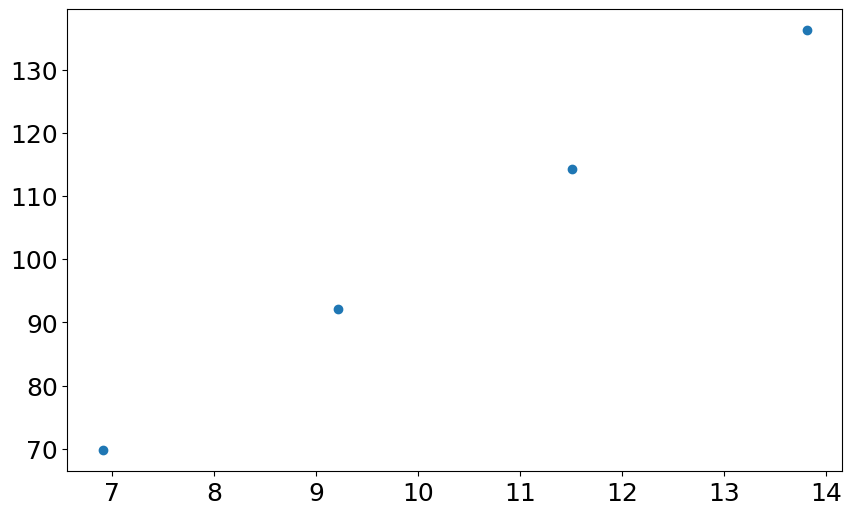

In [220]:
plt.scatter(np.log(burst2), parametersx0)

In [221]:
print(burst2)

[1000, 10000, 100000, 1000000]


In [36]:
data3sp = pd.read_csv("3stageprofilehigh.csv")

In [37]:
l = np.array(data3sp.Line)
sq = np.array(data3sp.Square)
rg = np.array(data3sp.Ring)
st = np.array(data3sp.Star)

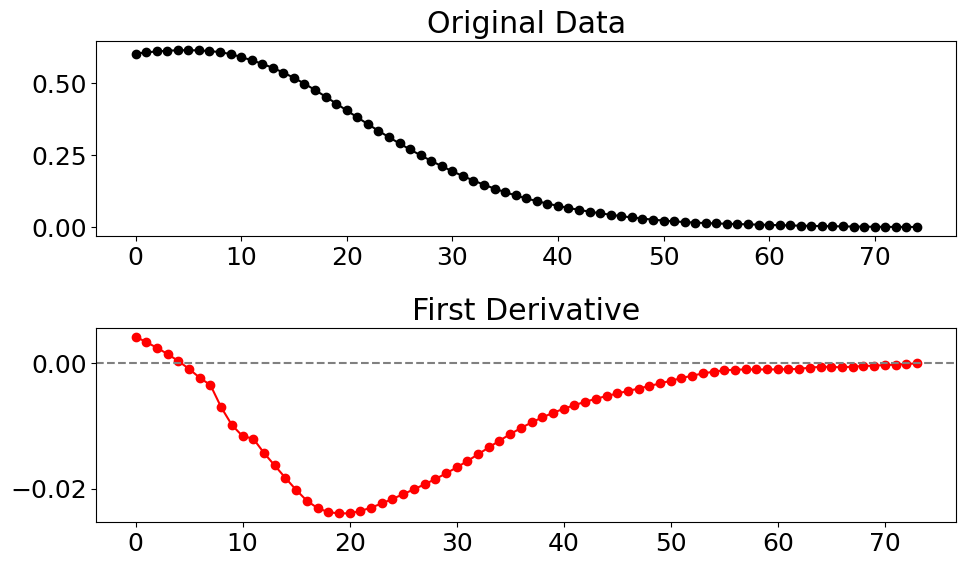

The dataset starts transitioning at index 8 with value 0.6077575142674903


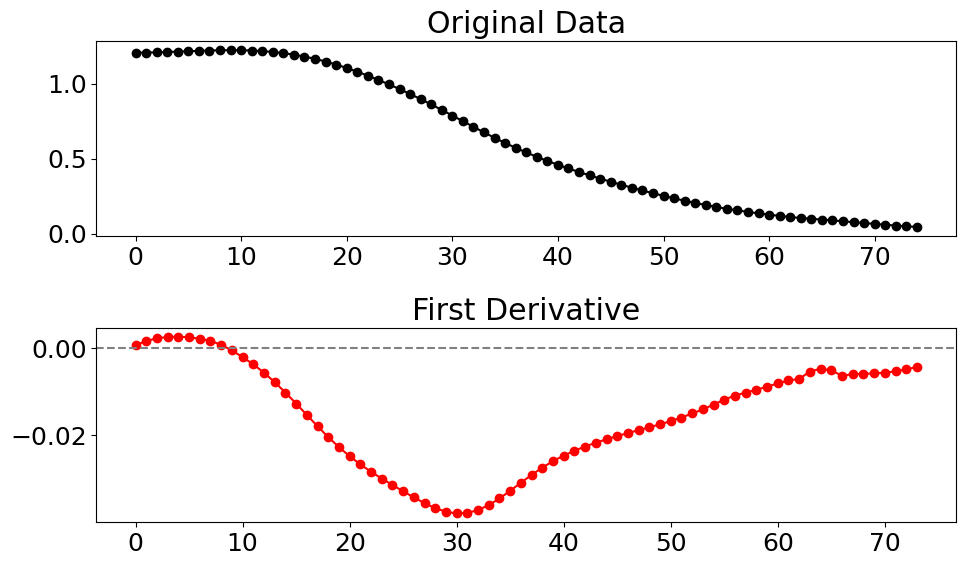

The dataset starts transitioning at index 12 with value 1.2191914384119724


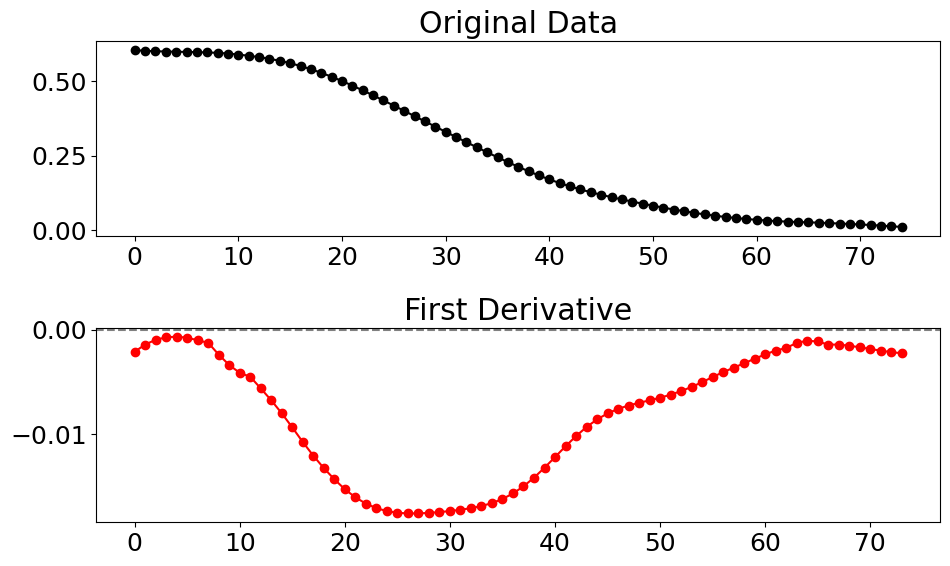

The dataset starts transitioning at index 9 with value 0.5924749078964869


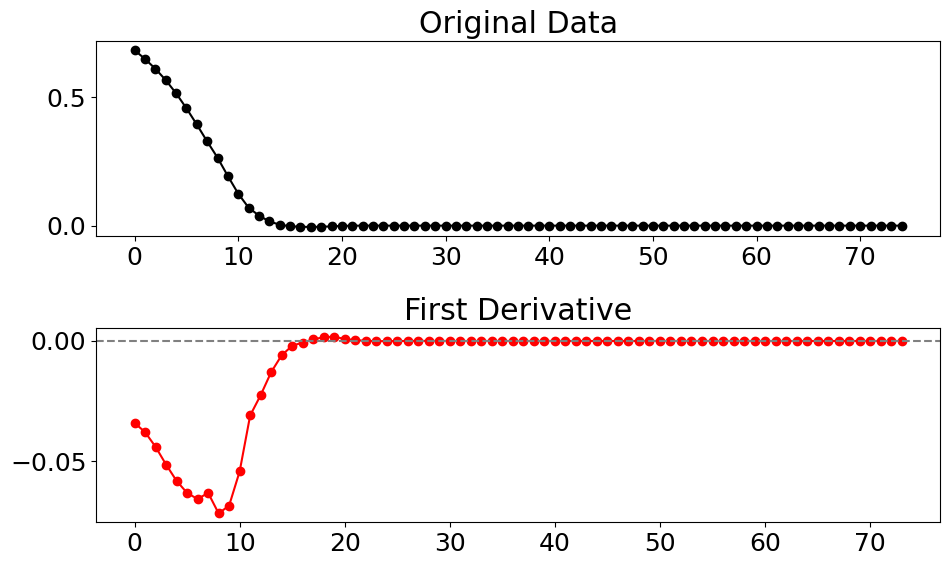

The dataset starts transitioning at index 2 with value 0.6102588926920168


In [38]:
filtered = []
transition2 = []
arr = np.array([l, sq, rg, st])
for dataset in arr:
    y_data = savgol_filter(dataset, window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=15, polyorder=4)
    y_data = savgol_filter(y_data,window_length=15, polyorder=5)
    y_data = savgol_filter(y_data, window_length=20, polyorder=6)
    y_data = savgol_filter(y_data, window_length=20, polyorder=6)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    point = find_transition_point(y_data)
    transition2.append(point)


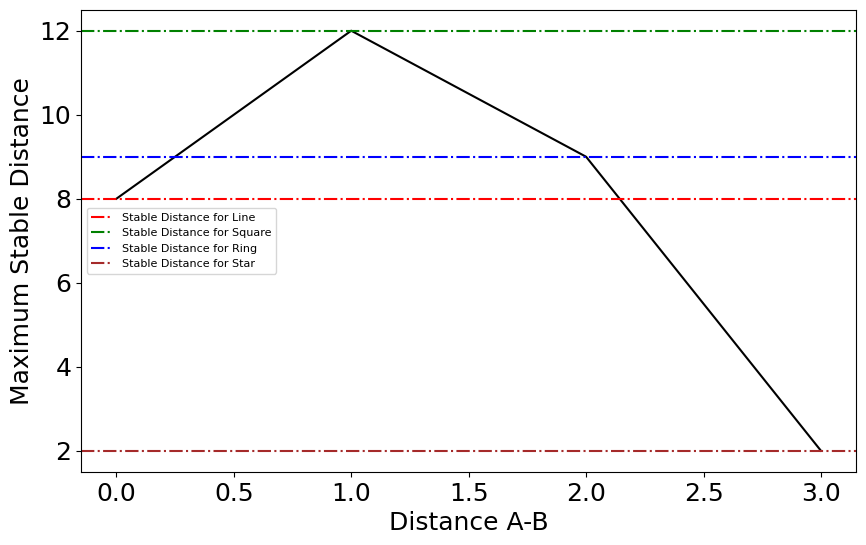

In [39]:
label1=['Line', 'Square', 'Ring', 'Star']
color = ['red','green', 'blue', 'brown']
plt.plot(transition2, c='k')
for i in range(len(transition2)):

    plt.axhline(transition2[i], c=color[i], label=f'Stable Distance for {label1[i]}', ls='-.')
    plt.legend(fontsize=8)
    plt.xlabel('Distance A-B')
    plt.ylabel('Maximum Stable Distance')
    
plt.savefig("Max-stable-distance-3-stage", dpi=500)

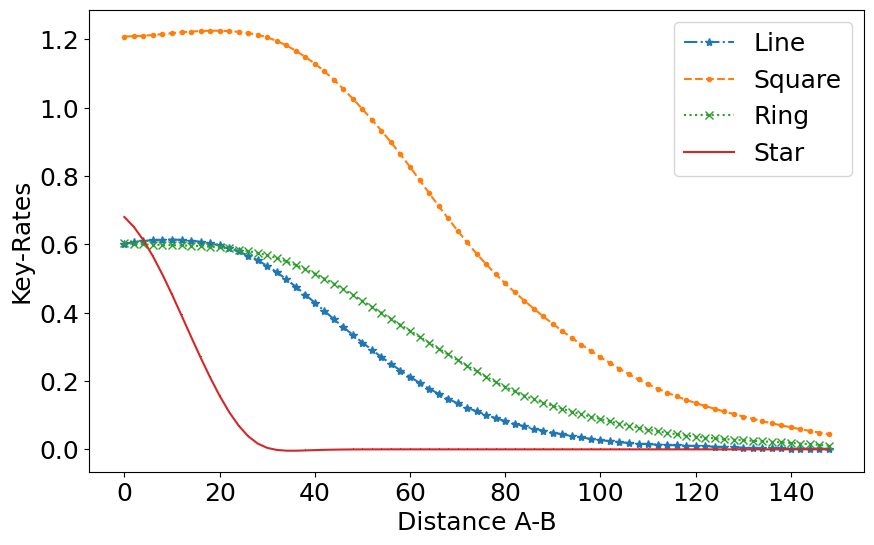

In [46]:
label1=['Line', 'Square', 'Ring', 'Star']
ls = ['-.', '--', ':', 'solid']
marker = ["*", ".", "x", ","]
x = np.array(range(0, 150, 2))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker =marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
    
plt.savefig("3-Stage-Profile", dpi=1000)

In [47]:
datadecoy = pd.read_csv("decoyprofile.csv")

In [48]:
display(datadecoy)

,Line,Square,Ring,Star
0,0.1776,0.3447,0.1714,0.1519
1,0.1735,0.3296,0.1630,0.1406
2,0.1602,0.3375,0.1592,0.1179
3,0.1541,0.3165,0.1548,0.0922
4,0.1519,0.3188,0.1501,0.0864
...,...,...,...,...
70,0.0149,0.0608,0.0247,0.0000
71,0.0121,0.0561,0.0231,0.0000
72,0.0150,0.0550,0.0227,0.0000
73,0.0107,0.0613,0.0230,0.0000


In [49]:
l = np.array(datadecoy.Line)
sq = np.array(datadecoy.Square)
rg = np.array(datadecoy.Ring)
st = np.array(datadecoy.Star)

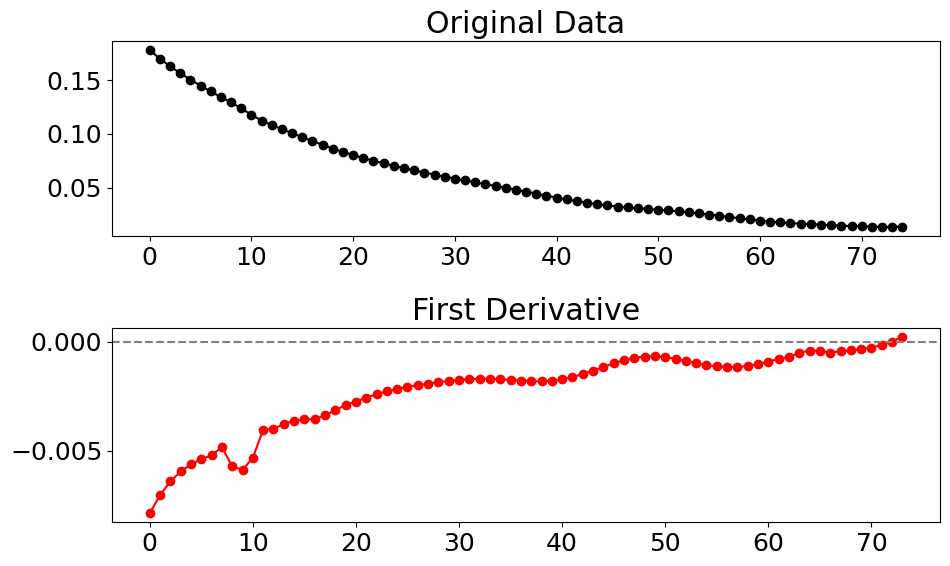

The dataset starts transitioning at index 2 with value 0.16279342960777266


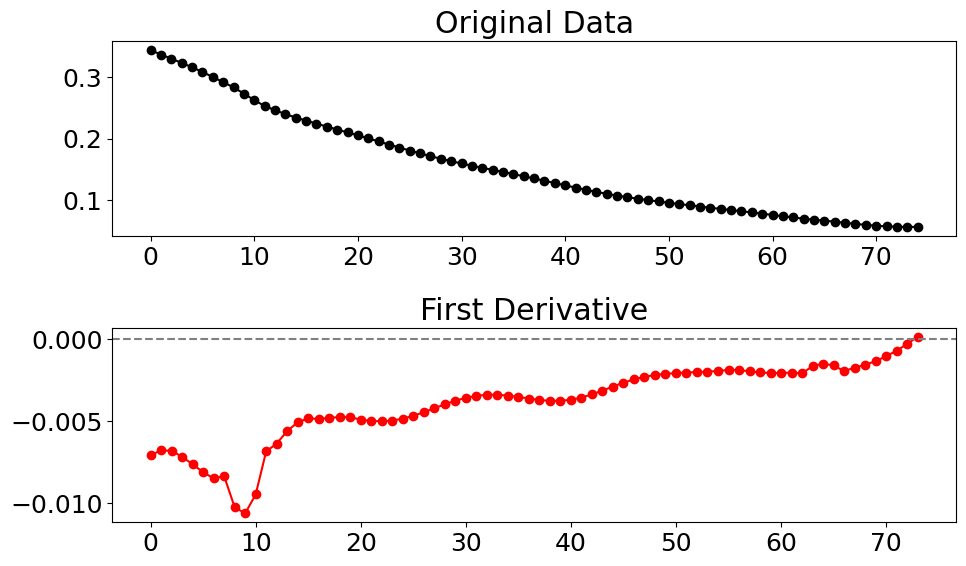

The dataset starts transitioning at index 2 with value 0.33014373877391323


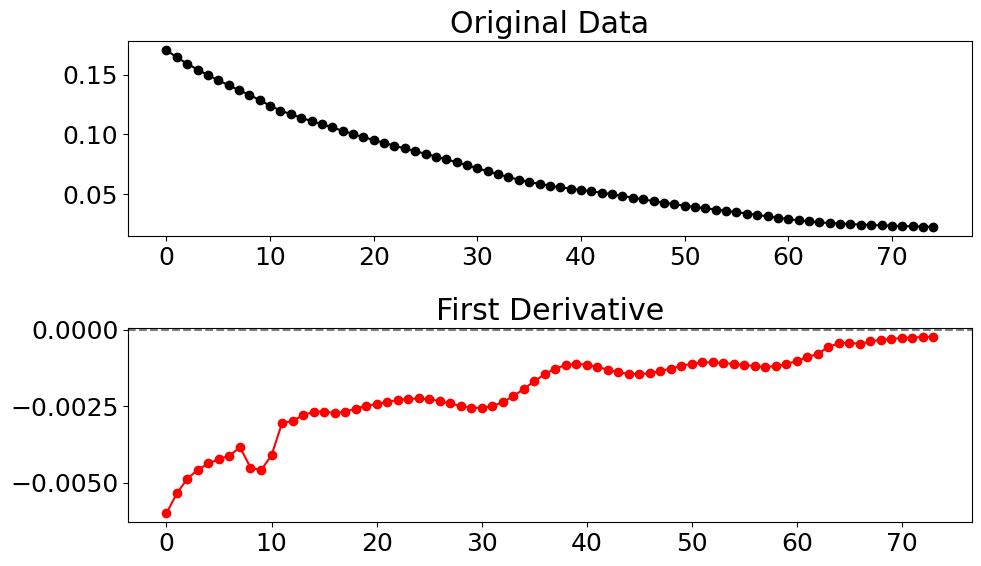

The dataset starts transitioning at index 2 with value 0.15920675601792236


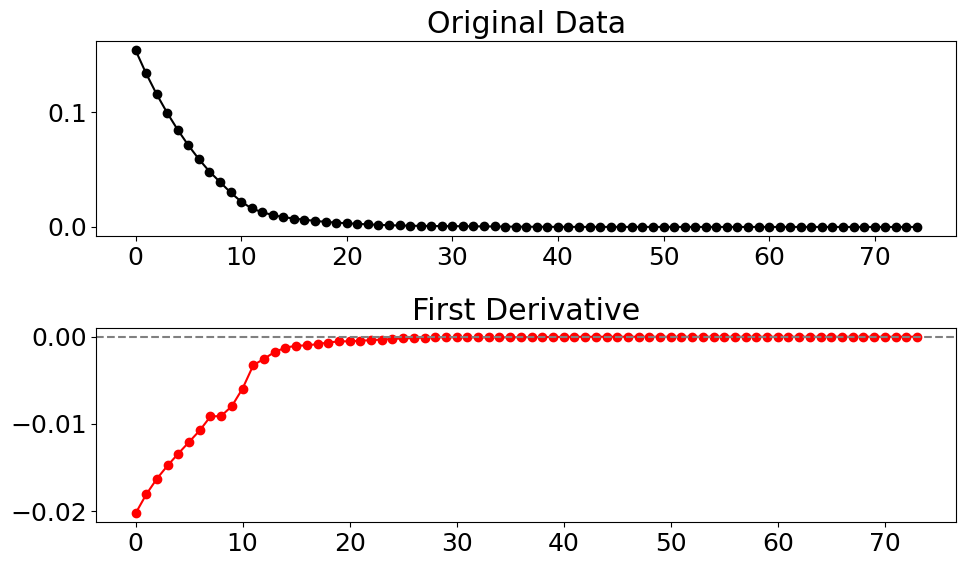

The dataset starts transitioning at index 2 with value 0.11553770819347942


In [50]:
filtered = []
transition2 = []
arr = np.array([l, sq, rg, st])
for dataset in arr:
    y_data = savgol_filter(dataset, window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=15, polyorder=4)
    y_data = savgol_filter(y_data,window_length=15, polyorder=5)
    y_data = savgol_filter(y_data, window_length=20, polyorder=6)
    y_data = savgol_filter(y_data, window_length=20, polyorder=6)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    point = find_transition_point(y_data)
    transition2.append(point)


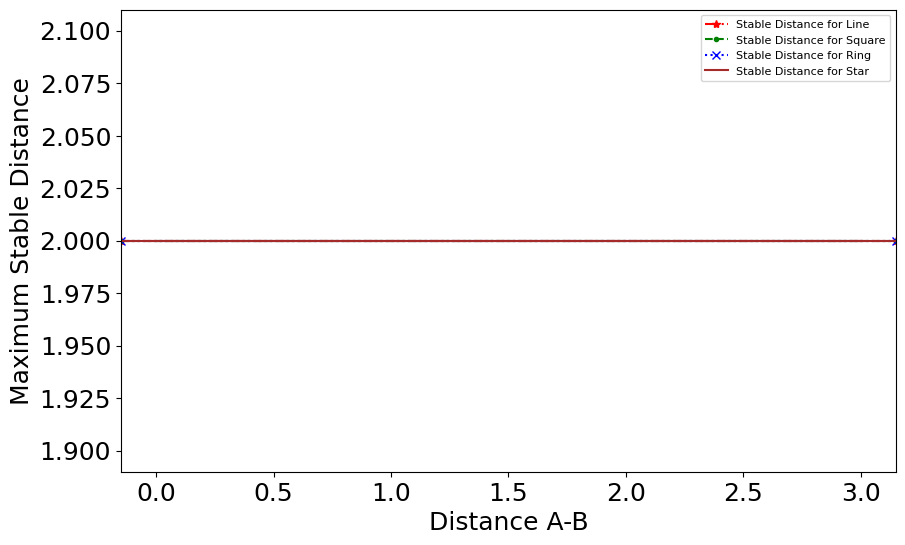

In [51]:
label1=['Line', 'Square', 'Ring', 'Star']
color = ['red','green', 'blue', 'brown']
marker = ["*", ".", "x", ","]
ls = ['-.', '--', ':', 'solid']
plt.plot(transition2, c='k')
for i in range(len(transition2)):

    plt.axhline(transition2[i], c=color[i], label=f'Stable Distance for {label1[i]}', ls=ls[i], marker=marker[i])
    plt.legend(fontsize=8)
    plt.xlabel('Distance A-B')
    plt.ylabel('Maximum Stable Distance')

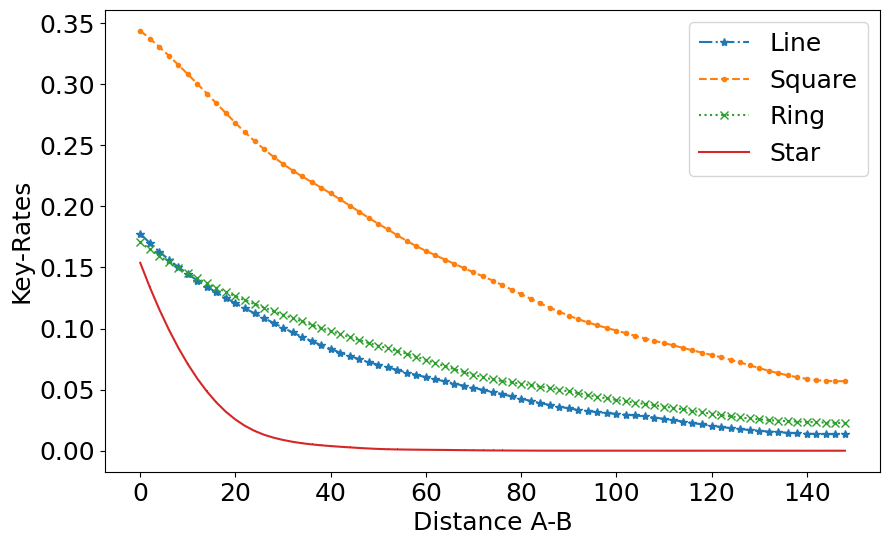

In [52]:
label1=['Line', 'Square', 'Ring', 'Star']
x = np.array(range(0, 150, 2))
marker = ["*", ".", "x", ","]
ls = ['-.', '--', ':', 'solid']
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('Decoy-State', dpi=1000)

In [53]:
datadirect = pd.read_csv('direct100000.csv')

In [54]:
display(datadirect)

,Decoy,Three_Stage,E91,E91_Repeater
0,0.17361,0.62008,0.40678,0.30084
1,0.16016,0.61835,0.37343,0.30275
2,0.15098,0.61905,0.34808,0.30664
3,0.13652,0.61254,0.33150,0.30581
4,0.12987,0.60759,0.30646,0.30504
...,...,...,...,...
120,0.00006,0.00000,0.00014,0.00149
121,0.00001,0.00000,0.00007,0.00184
122,0.00004,0.00000,0.00009,0.00207
123,0.00005,0.00000,0.00009,0.00176


In [55]:
decoy = np.array(datadirect.Decoy)
three_stage = np.array(datadirect.Three_Stage)
E91 = np.array(datadirect.E91)
E91_Repeater = np.array(datadirect.E91_Repeater)
arr = np.array([decoy, three_stage, E91, E91_Repeater])

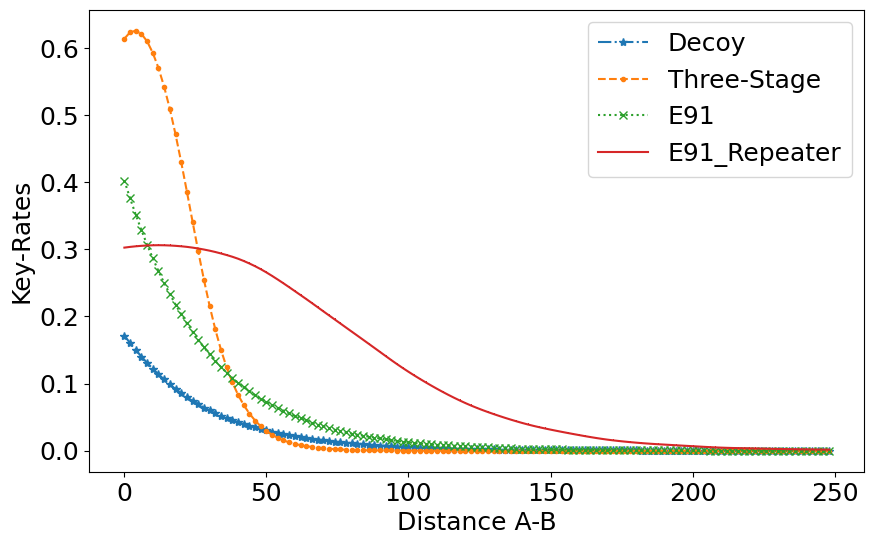

In [56]:
arr = np.array([decoy, three_stage, E91, E91_Repeater])
x = np.array(range(0, 250, 2))
ls = ['-.', '--', ':', 'solid']
label1=['Decoy', 'Three-Stage', 'E91', 'E91_Repeater']
marker = ["*", ".", "x", ","]
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('DirectTopology', dpi=1000)

In [57]:
dataE91 = pd.read_csv('e91profile100000.csv')

In [58]:
display(dataE91)

,Line,Square,Ring,Star
0,0.30601,0.32469,0.32586,0.30625
1,0.30529,0.31613,0.32106,0.30825
2,0.29916,0.31507,0.32863,0.30378
3,0.31153,0.31875,0.31535,0.30710
4,0.30052,0.32330,0.33088,0.30280
...,...,...,...,...
120,0.00152,0.00315,0.00017,0.00194
121,0.00069,0.00267,0.00020,0.00151
122,0.00135,0.00261,0.00033,0.00157
123,0.00160,0.00152,0.00019,0.00167


In [59]:
l = np.array(dataE91.Line)
sq = np.array(dataE91.Square)
rg = np.array(dataE91.Ring)
st = np.array(dataE91.Star)

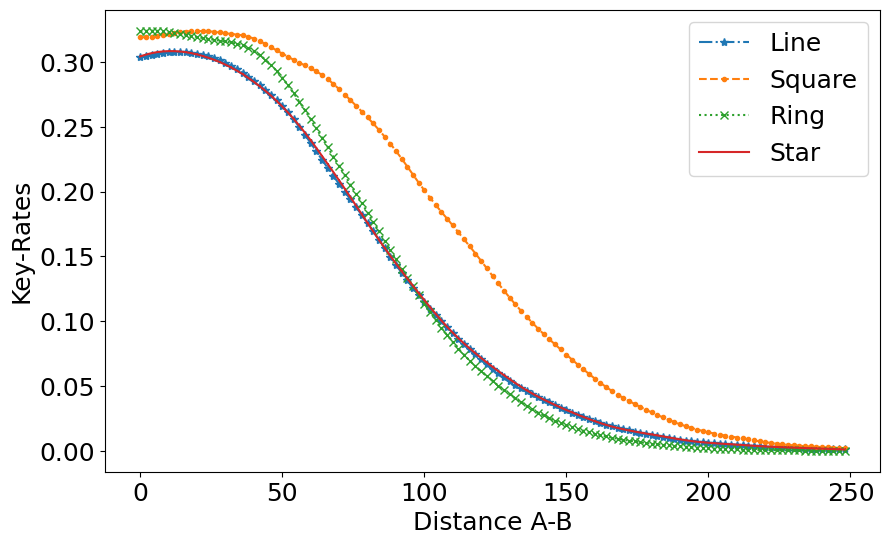

In [60]:
arr = np.array([l, sq, rg, st])
label1=['Line', 'Square', 'Ring', 'Star']
ls = ['-.', '--', ':', 'solid']
marker = ["*", ".", "x", ","]
x = np.array(range(0, 250, 2))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('e91profile', dpi=1000)

In [61]:
datatorus = pd.read_csv('torusburst3stage.csv')

In [62]:
display(datatorus)

,Burst1,Burst5,Burst10,Burst15,Burst20
0,2.18650,2.43435,2.42900,2.43880,2.41585
1,1.98010,2.47410,2.46880,2.42300,2.45405
2,1.77925,2.46275,2.41005,2.46000,2.46400
3,1.63205,2.44185,2.45885,2.44385,2.44630
4,1.46475,2.39935,2.43935,2.44490,2.49610
...,...,...,...,...,...
75,0.00065,0.00520,0.01050,0.01665,0.01965
76,0.00095,0.00375,0.00705,0.00925,0.01835
77,0.00095,0.00390,0.00755,0.00935,0.01475
78,0.00025,0.00305,0.00495,0.00975,0.01115


In [65]:
burst1 = np.array(datatorus.Burst1)
burst5 = np.array(datatorus.Burst5)
burst10 = np.array(datatorus.Burst10)
burst15 = np.array(datatorus.Burst15)
burst20 = np.array(datatorus.Burst20)

In [66]:
b = np.array([burst1, burst5, burst10, burst15, burst20])

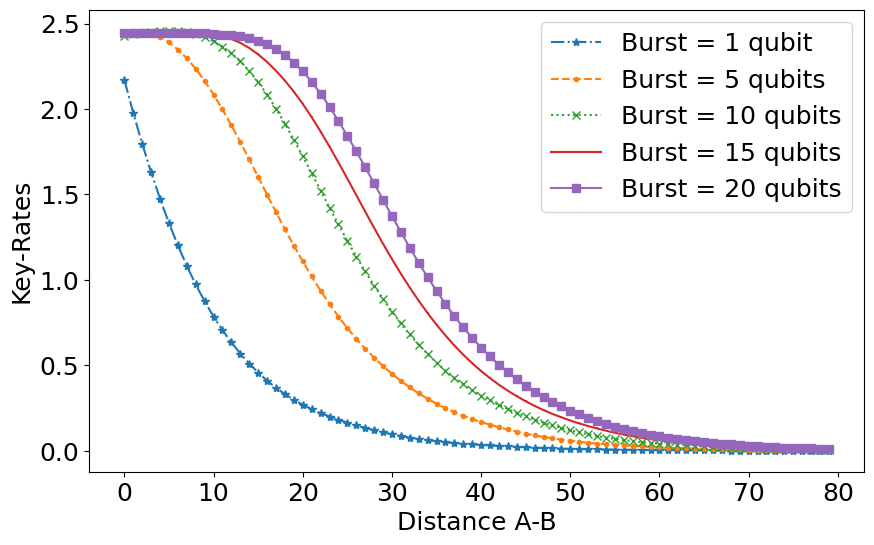

In [67]:
arr = b
label1=['Burst = 1 qubit', 'Burst = 5 qubits', 'Burst = 10 qubits', 'Burst = 15 qubits', 'Burst = 20 qubits']
marker = ["*", ".", "x", ",", "s"]
x = np.array(range(0, 80, 1))
ls = ['-.', '--', ':', 'solid', 'solid']
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('torusprofile3stage', dpi=1000)

In [68]:
datae91burst = pd.read_csv('e91burstnew.csv')

In [69]:
display(datae91burst)

,Burst1,Burst5,Burst10,Burst15,Burst20
0,0.3027,0.3059,0.3111,0.2937,0.2797
1,0.2637,0.3013,0.2904,0.2945,0.3106
2,0.2514,0.2903,0.2868,0.3216,0.3128
3,0.2388,0.2826,0.3011,0.2900,0.3104
4,0.2275,0.2964,0.3134,0.3251,0.3100
...,...,...,...,...,...
120,0.0001,0.0034,0.0087,0.0155,0.0204
121,0.0001,0.0022,0.0072,0.0102,0.0283
122,0.0000,0.0024,0.0047,0.0121,0.0206
123,0.0000,0.0018,0.0080,0.0145,0.0197


In [70]:
burst1 = np.array(datae91burst.Burst1)
burst5 = np.array(datae91burst.Burst5)
burst10 = np.array(datae91burst.Burst10)
burst15 = np.array(datae91burst.Burst15)
burst20 = np.array(datae91burst.Burst20)

In [71]:
b = np.array([burst1, burst5, burst10, burst15, burst20])

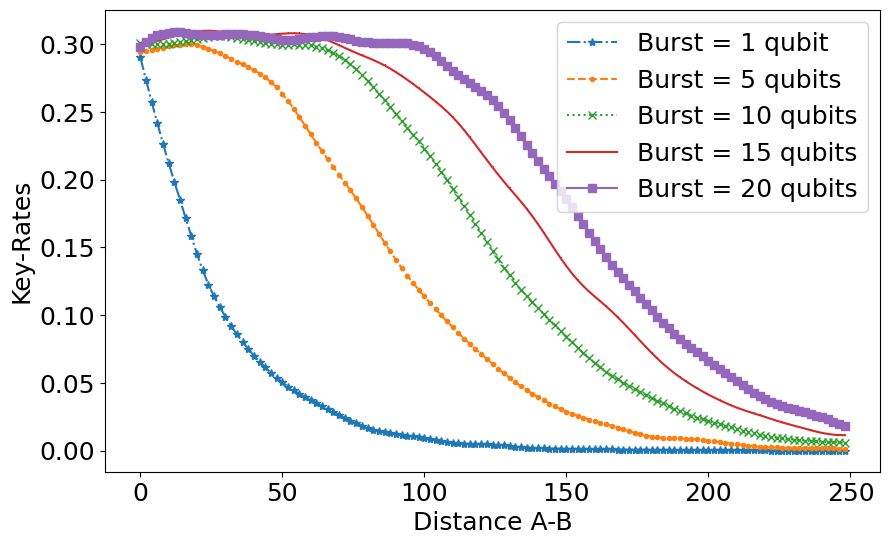

In [74]:
arr = b
label1=['Burst = 1 qubit', 'Burst = 5 qubits', 'Burst = 10 qubits', 'Burst = 15 qubits', 'Burst = 20 qubits']
ls = ['-.', '--', ':', 'solid', 'solid']
marker = ["*", ".", "x", ",", "s"]

x = np.array(range(0, 250, 2))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=20, polyorder=4)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data, window_length=11, polyorder=5)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('e91burstnew', dpi=1000)

In [75]:
data3sb = pd.read_csv('3sb.csv')

In [76]:
display(data3sb)

,Burst1,Burst5,Burst10,Burst15,Burst20
0,0.55522,0.60861,0.61604,0.61141,0.61664
1,0.49488,0.61199,0.60771,0.61372,0.60941
2,0.45895,0.61318,0.61161,0.61644,0.60671
3,0.40627,0.62374,0.60579,0.60911,0.61422
4,0.36555,0.60827,0.62232,0.61453,0.61121
...,...,...,...,...,...
75,0.00021,0.00150,0.00200,0.00326,0.00421
76,0.00029,0.00079,0.00192,0.00328,0.00453
77,0.00004,0.00133,0.00165,0.00203,0.00369
78,0.00008,0.00060,0.00158,0.00206,0.00393


In [77]:
burst1 = np.array(data3sb.Burst1)
burst5 = np.array(data3sb.Burst5)
burst10 = np.array(data3sb.Burst10)
burst15 = np.array(data3sb.Burst15)
burst20 = np.array(data3sb.Burst20)

In [78]:
b = np.array([burst1, burst5, burst10, burst15, burst20])
len(burst1)

80

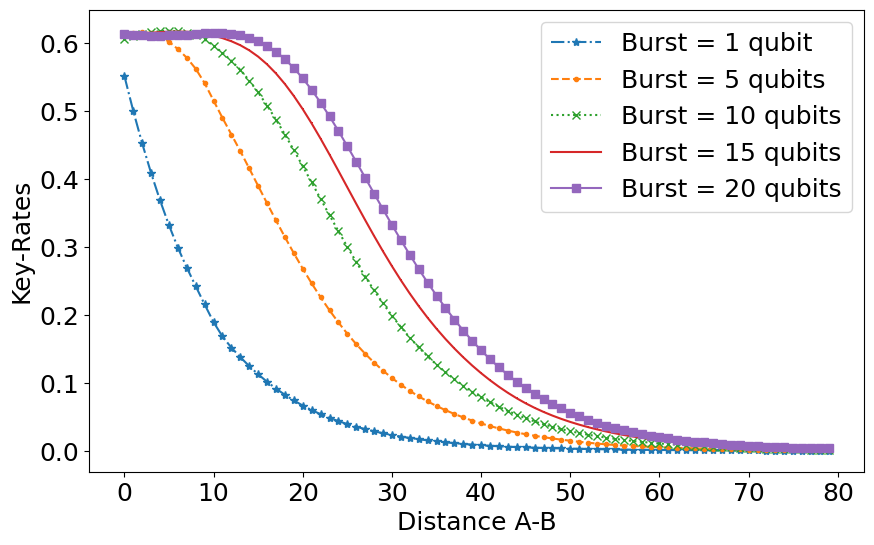

In [79]:
arr = b
label1=['Burst = 1 qubit', 'Burst = 5 qubits', 'Burst = 10 qubits', 'Burst = 15 qubits', 'Burst = 20 qubits']
ls = ['-.', '--', ':', 'solid', 'solid']
marker = ["*", ".", "x", ",", "s"]
x = np.array(range(0, 80, 1))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=20, polyorder=4)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('3stageburst', dpi=1000)

In [64]:
datasq = pd.read_csv('square_L_10000.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'square_L_10000.csv'

In [ ]:
dec = np.array(datasq.Decoy)
e91 = np.array(datasq.E91)
threes = np.array(datasq.threeStage)

In [ ]:
arr = [dec, e91, threes]

In [ ]:
label1 = ['Decoy-State', 'E91', '3-Stage']

In [ ]:
x = np.array(range(0, 120, 2))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=20, polyorder=4)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls='-.', label=label1[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('square-alltrusted', dpi=500)

In [ ]:
dataline = pd.read_csv('line_all_trusted_L_10000.csv')

In [ ]:
dec = np.array(dataline.Decoy)
e91 = np.array(dataline.E91)
threes = np.array(dataline.threeStage)

In [ ]:
arr = [dec, e91, threes]

In [ ]:
label1 = ['Decoy-State', 'E91', '3-Stage']

In [ ]:
x = np.array(range(0, 120, 2))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=20, polyorder=4)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls='-.', label=label1[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('line-alltrusted', dpi=1000)

In [90]:
datasq = pd.read_csv('ring_all_trusted_L_10000.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ring_all_trusted_L_10000.csv'

In [ ]:
dec = np.array(datasq.Decoy)
e91 = np.array(datasq.E91)
threes = np.array(datasq.threeStage)

In [ ]:
arr = [dec, e91, threes]

In [ ]:
label1 = ['Decoy-State', 'E91', '3-Stage']

In [ ]:
x = np.array(range(0, 120, 2))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=20, polyorder=4)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls='-.', label=label1[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('ring-alltrusted', dpi=1000)

In [ ]:
datasq = pd.read_csv('star_L_10000.csv')
display(datasq)

In [ ]:
dec = np.array(datasq.Decoy)
e91 = np.array(datasq.E91)
threes = np.array(datasq.threeStage)

In [ ]:
arr = [dec, e91, threes]

In [ ]:
label1 = ['Decoy-State', 'E91', '3-Stage']

In [ ]:
x = np.array(range(0, 120, 2))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data,window_length=20, polyorder=4)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls='-.', label=label1[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('star-alltrusted', dpi=500)

In [80]:
data1200 = pd.read_csv('3stage1200.csv')

In [81]:
display(data1200)

,Burst400,Burst600,Burst800,Burst1000,Burst1200
0,0.60500,0.63908,0.61422,0.62412,0.60720
1,0.61764,0.61966,0.60480,0.62454,0.61362
2,0.61382,0.60820,0.60840,0.59786,0.62048
3,0.62250,0.61462,0.62028,0.61180,0.62028
4,0.62392,0.62108,0.60840,0.61826,0.62434
...,...,...,...,...,...
105,0.00000,0.00000,0.00000,0.00000,0.00000
106,0.00000,0.00000,0.00000,0.00000,0.00000
107,0.00000,0.00000,0.00000,0.00000,0.00000
108,0.00000,0.00000,0.00000,0.00000,0.00000


In [82]:
b400 = np.array(data1200.Burst400)
b600 = np.array(data1200.Burst600)
b800 = np.array(data1200.Burst800)
b1200 = np.array(data1200.Burst1200)
b1000 = np.array(data1200.Burst1000)

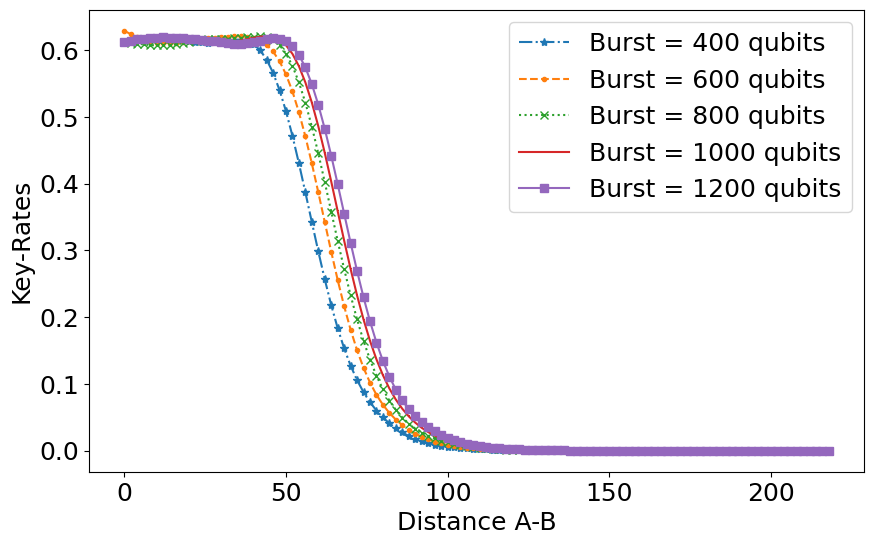

In [83]:
arr = [b400, b600, b800, b1000, b1200]
label1 = ['Burst = 400 qubits', 'Burst = 600 qubits', 'Burst = 800 qubits', 'Burst = 1000 qubits', 'Burst = 1200 qubits' ]
ls = ['-.', '--', ':', 'solid', 'solid']
x = np.array(range(0, 220, 2))
marker = ["*", ".", "x", ",", "s"]
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=6)
    y_data = savgol_filter(y_data,window_length=20, polyorder=5)
    y_data = savgol_filter(y_data, window_length=5, polyorder=4)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()

KeyboardInterrupt: 

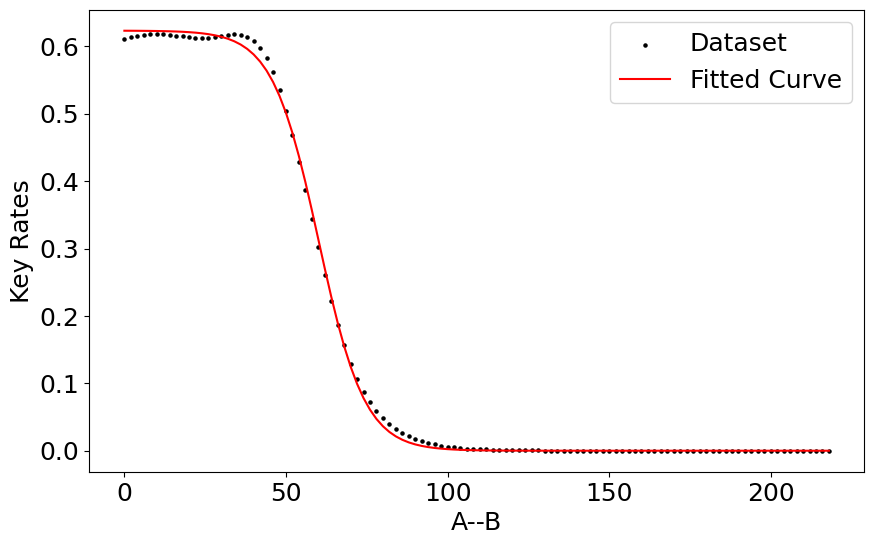

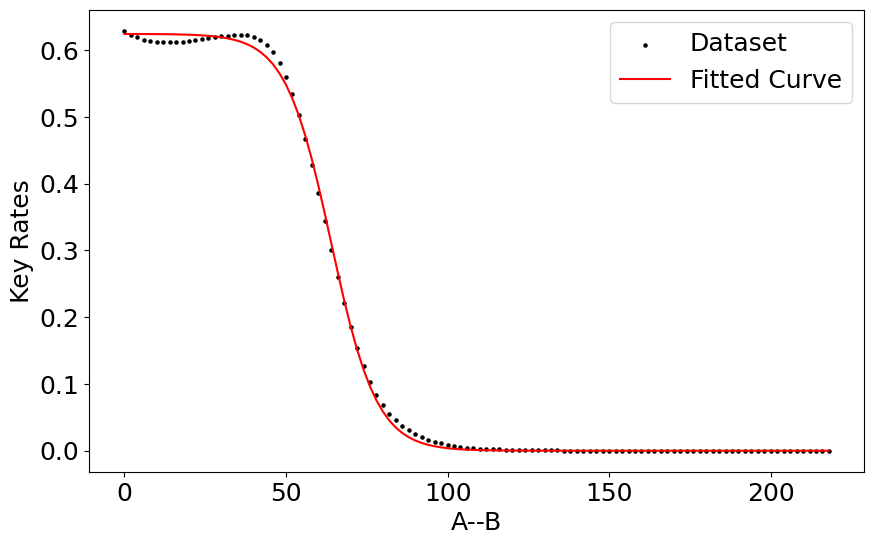

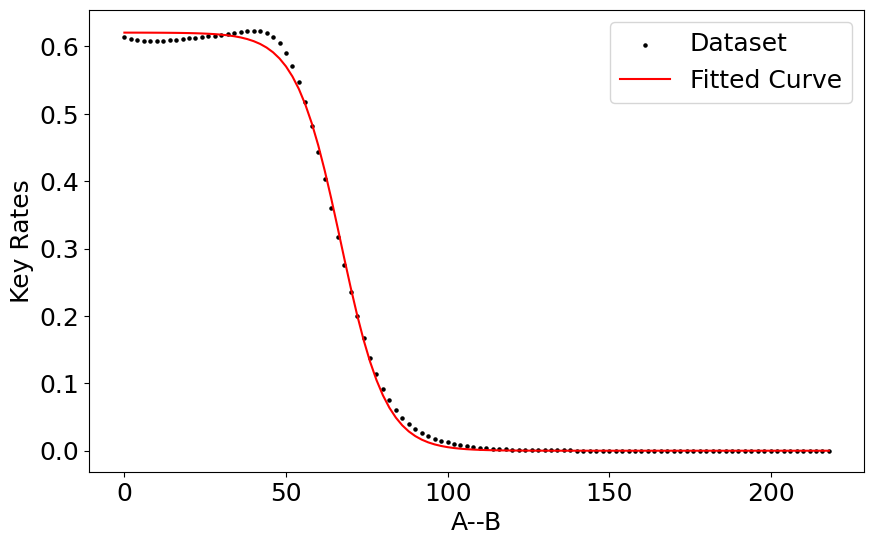

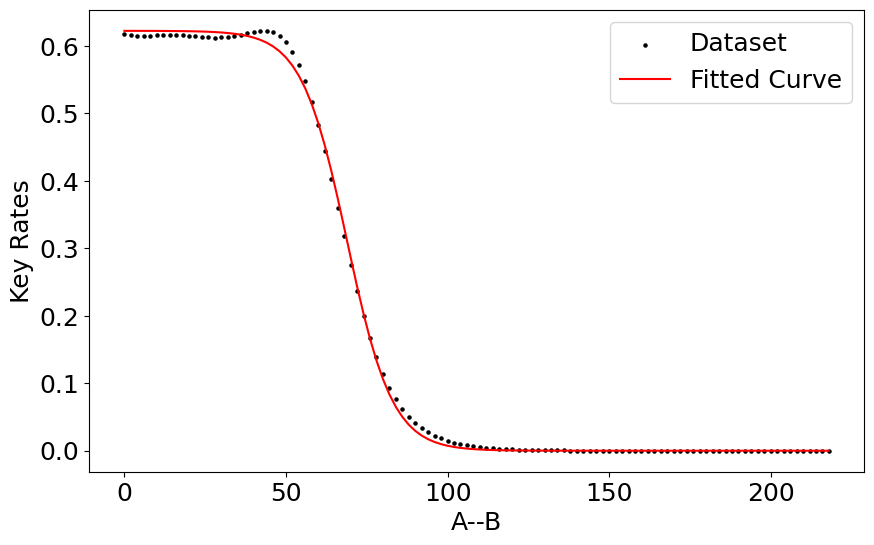

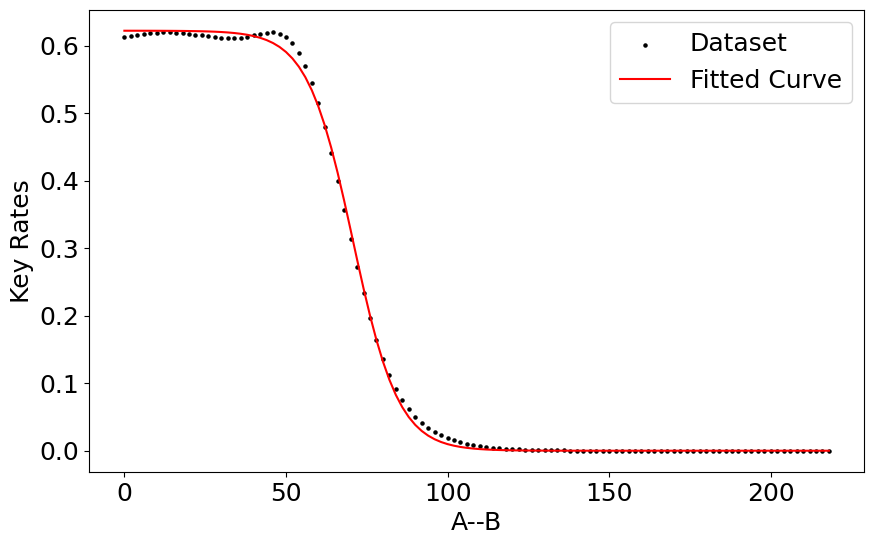

In [84]:
for b in range(len(arr)):
    y_data = savgol_filter(arr[b], window_length=3, polyorder=2)
    y_data = savgol_filter(y_data, window_length=11, polyorder=3)
    y_data = savgol_filter(y_data, window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=20, polyorder=6)
    y_data = savgol_filter(y_data,window_length=25, polyorder=5)
    y_data = savgol_filter(y_data,window_length=25, polyorder=11)
    p = fitcurveS(x, y_data)
    plt.savefig(f'curvefit_{label1[b]}', dpi=1000)


In [85]:
datatorus = pd.read_csv('toruse91.csv')

In [86]:
display(datatorus)

,Burst1,Burst5,Burst10,Burst15,Burst20
0,1.62480,1.68100,1.67470,1.66810,1.66780
1,1.50595,1.63815,1.67565,1.68260,1.66885
2,1.42455,1.66615,1.65065,1.68650,1.63980
3,1.33280,1.65265,1.67650,1.64380,1.67305
4,1.24620,1.66600,1.65300,1.68745,1.66145
5,1.13960,1.66145,1.69030,1.66850,1.67665
6,1.07175,1.66395,1.65375,1.66040,1.66005
7,0.98440,1.66725,1.65850,1.67355,1.63500
8,0.92880,1.64095,1.64735,1.66755,1.67310
9,0.85675,1.63900,1.66425,1.66610,1.64885


In [87]:
burst1 = np.array(datatorus.Burst1)
burst5 = np.array(datatorus.Burst5)
burst10 = np.array(datatorus.Burst10)
burst15 = np.array(datatorus.Burst15)
burst20 = np.array(datatorus.Burst20)

In [88]:
b = np.array([burst1, burst5, burst10, burst15, burst20])

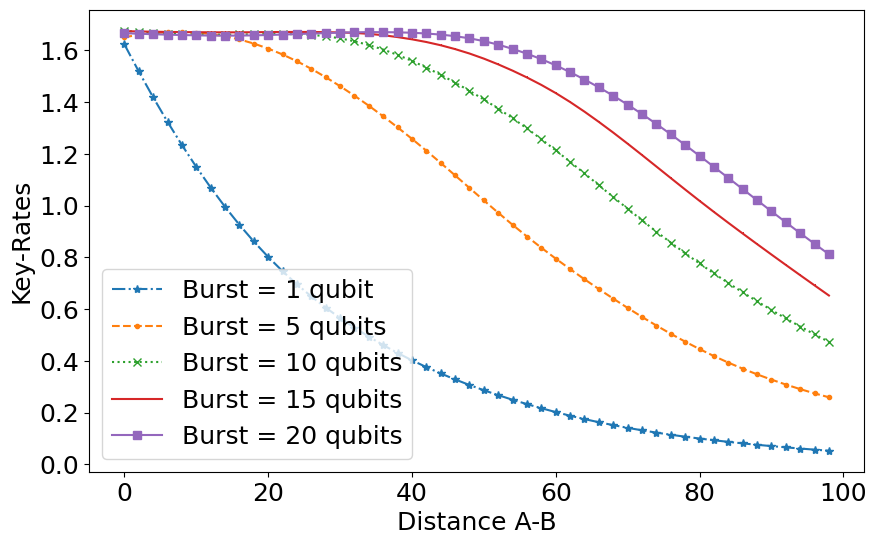

In [89]:
arr = b
label1=['Burst = 1 qubit', 'Burst = 5 qubits', 'Burst = 10 qubits', 'Burst = 15 qubits', 'Burst = 20 qubits']
ls = ['-.', '--', ':', 'solid', 'solid']
marker = ["*", ".", "x", ",", "s"]
x = np.array(range(0, 100, 2))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('torusprofile91', dpi=1000)

,Burst1,Burst5,Burst10,Burst15,Burst20
0,2.18650,2.43435,2.42900,2.43880,2.41585
1,1.98010,2.47410,2.46880,2.42300,2.45405
2,1.77925,2.46275,2.41005,2.46000,2.46400
3,1.63205,2.44185,2.45885,2.44385,2.44630
4,1.46475,2.39935,2.43935,2.44490,2.49610
...,...,...,...,...,...
75,0.00065,0.00520,0.01050,0.01665,0.01965
76,0.00095,0.00375,0.00705,0.00925,0.01835
77,0.00095,0.00390,0.00755,0.00935,0.01475
78,0.00025,0.00305,0.00495,0.00975,0.01115


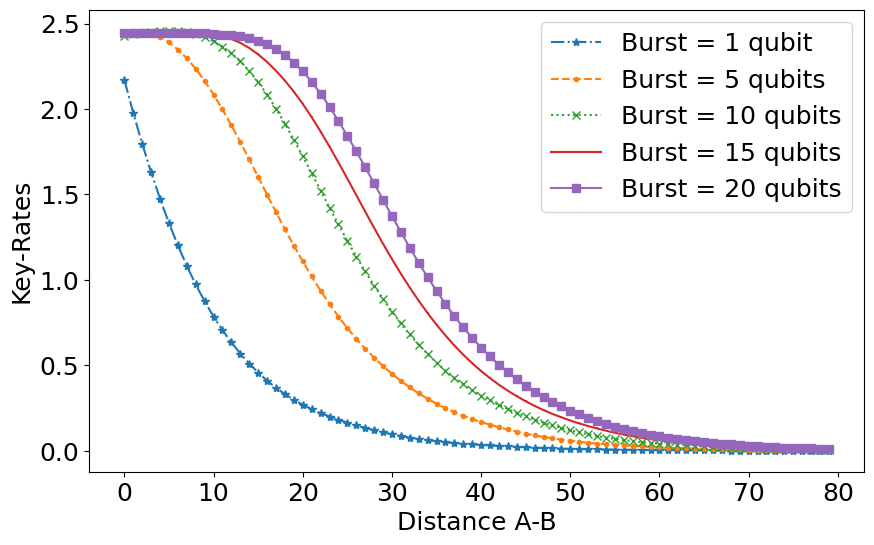

In [90]:
datatorus = pd.read_csv('torusburst3stage.csv')

display(datatorus)

burst1 = np.array(datatorus.Burst1)
burst5 = np.array(datatorus.Burst5)
burst10 = np.array(datatorus.Burst10)
burst15 = np.array(datatorus.Burst15)
burst20 = np.array(datatorus.Burst20)

b = np.array([burst1, burst5, burst10, burst15, burst20])
marker = ["*", ".", "x", ",", "s"]
arr = b
label1=['Burst = 1 qubit', 'Burst = 5 qubits', 'Burst = 10 qubits', 'Burst = 15 qubits', 'Burst = 20 qubits']
x = np.array(range(0, 80, 1))
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls=ls[i], label=label1[i], marker=marker[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend()
plt.savefig('torusprofile3stage', dpi=1000)

In [1]:
burst1 = [1, 50, 100, 150, 200]
burst2 = [1000, 10000, 100000, 1000000]
burst = burst1+burst2

In [2]:
print(burst)

[1, 50, 100, 150, 200, 1000, 10000, 100000, 1000000]


In [3]:
import numpy as np
print(np.log(burst))

[ 0.          3.91202301  4.60517019  5.01063529  5.29831737  6.90775528
  9.21034037 11.51292546 13.81551056]
